# TAVAC Score Analysis for Different Datasets

## Introduction

This Jupyter Notebook is designed to perform an in-depth analysis of TAVAC (Training and Validation Attention Consistency) scores across various datasets. The primary objectives of this notebook are:

1. **Calculate TAVAC Scores**: Compute the TAVAC scores for different datasets using pre-defined models.
2. **Generate Histograms**: Create histograms to visualize the distribution of TAVAC scores.
3. **Model Comparison**: Compare the performance of models categorized as 'good fit' versus 'overfit' based on their TAVAC scores.

### Steps Involved:

1. **Data Loading**: Import the datasets to be analyzed.
2. **TAVAC Calculation**: Apply the TAVAC calculation method to each dataset.
3. **Visualization**: Generate histograms to show the distribution of TAVAC scores for each dataset.
4. **Comparison Analysis**: Compare the histograms of good fit models against overfit models to identify patterns and differences.

By the end of this notebook, we aim to have a comprehensive understanding of how TAVAC scores vary across different datasets and models, and how these variations can indicate model fit quality.


In [3]:
import numpy as np
from PIL import Image
import torch
from transformers import TrainingArguments, Trainer



In [4]:
import glob
#data_set = 'cifar10' ###epochs:10, 50, 100
data_set = 'food101'  ###epochs: 10, 100
#data_set = 'cats_vs_dogs'  ###epochs:1000, 5000, 
#data_set = 'mnist'  ###epochs:1500, 2000

#list_of_files = glob.glob(f'{data_set}_validation_img_2stage_e{str(num_epoch)}/*.png')



In [5]:
diff_corr = []
num_epoch = 10
for i in range(500):
    f1 = f'{data_set}_validation_img_2stage_e{str(num_epoch)}/{i}_test.png'
    im_array1 = np.asarray(Image.open(f1).convert('RGB'))
    
    f2 = f'{data_set}_train_img_e{str(num_epoch)}/{i}_train.png'
    im_array2 = np.asarray(Image.open(f2).convert('RGB'))
    cor1 = np.corrcoef(im_array1.flatten(), im_array2.flatten())[0,1]
    
    #print(cor1)
    
    f1 = f'{data_set}_train_img_2stage_e{str(num_epoch)}/{i}_train.png'
    im_array1 = np.asarray(Image.open(f1).convert('RGB'))
    
    f2 = f'{data_set}_validation_img_e{str(num_epoch)}/{i}_test.png'
    im_array2 = np.asarray(Image.open(f2).convert('RGB'))
    cor2 = np.corrcoef(im_array1.flatten(), im_array2.flatten())[0,1]
    
    #print(cor2)
    diff_corr.append(cor1)
    diff_corr.append(cor2)




In [6]:
diff_corr_overfit = []
num_epoch = 100
for i in range(500):
    f1 = f'{data_set}_validation_img_2stage_e{str(num_epoch)}/{i}_test.png'
    im_array1 = np.asarray(Image.open(f1).convert('RGB'))
    
    f2 = f'{data_set}_train_img_e{str(num_epoch)}/{i}_train.png'
    im_array2 = np.asarray(Image.open(f2).convert('RGB'))
    cor1 = np.corrcoef(im_array1.flatten(), im_array2.flatten())[0,1]
    
    #print(cor1)
    
    f1 = f'{data_set}_train_img_2stage_e{str(num_epoch)}/{i}_train.png'
    im_array1 = np.asarray(Image.open(f1).convert('RGB'))
    
    f2 = f'{data_set}_validation_img_e{str(num_epoch)}/{i}_test.png'
    im_array2 = np.asarray(Image.open(f2).convert('RGB'))
    cor2 = np.corrcoef(im_array1.flatten(), im_array2.flatten())[0,1]
    
    #print(cor2)
    diff_corr_overfit.append(cor1)
    diff_corr_overfit.append(cor2)


In [7]:
# diff_corr_overfit100 = []
# num_epoch = 3000
# for i in range(500):
#     f1 = f'{data_set}_validation_img_2stage_e{str(num_epoch)}/{i}_test.png'
#     im_array1 = np.asarray(Image.open(f1).convert('RGB'))
    
#     f2 = f'{data_set}_train_img_e{str(num_epoch)}/{i}_train.png'
#     im_array2 = np.asarray(Image.open(f2).convert('RGB'))
#     cor1 = np.corrcoef(im_array1.flatten(), im_array2.flatten())[0,1]
    
#     #print(cor1)
    
#     f1 = f'{data_set}_train_img_2stage_e{str(num_epoch)}/{i}_train.png'
#     im_array1 = np.asarray(Image.open(f1).convert('RGB'))
    
#     f2 = f'{data_set}_validation_img_e{str(num_epoch)}/{i}_test.png'
#     im_array2 = np.asarray(Image.open(f2).convert('RGB'))
#     cor2 = np.corrcoef(im_array1.flatten(), im_array2.flatten())[0,1]
    
#     #print(cor2)
#     diff_corr_overfit100.append(cor1)
#     diff_corr_overfit100.append(cor2)


In [8]:
import matplotlib.pyplot as plt
font_size = 20

fig, ax = plt.subplots()
fig.set_size_inches(6,4)
plt.hist(diff_corr, alpha = 0.5, label = 'epoch=10')
plt.hist(diff_corr_overfit, alpha = 0.5, label = 'epoch=100')
#plt.hist(diff_corr_overfit100, alpha = 0.5, label = 'epoch=5000')
#plt.hist(diff_corr_overfit500, alpha = 0.5, label = 'epoch=500')

plt.legend(loc='upper left', fontsize = font_size*0.8)
plt.ylabel('Frequency',fontsize=font_size)
plt.xlabel('Correlations',fontsize=font_size)
ax.set_title(data_set + ' Correlation distribution vs epoch\n',fontsize=font_size)
 
# Create names on the x-axis
#plt.xticks(x_pos, bars)
ax.tick_params(axis='x', labelsize=font_size)
ax.tick_params(axis='y', labelsize=font_size)
plt.tight_layout()

In [ ]:
######bad focus tavac
import glob
import numpy as np
#data_set = 'cifar10'
data_set = 'cats_vs_dogs'
num_epoch = 5000 ##100 for cifar10 5000 for catdog

list_of_files1 = glob.glob("BadFocusImagesBadOnly-"+data_set+"/ValidationStage1/*.png")
list_of_files2 = glob.glob("BadFocusImagesBadOnly-"+data_set+"/ValidationStage2/*.png")


diff_corr_goodfocus = []
diff_corr_badfocus = []

v_stage1 = []
for f in list_of_files1:
    ar = f.split('/')
    image_id = int(ar[-1].replace('_test.png', ''))
    v_stage1.append(image_id)
    
v_stage2 = []
for f in list_of_files2:
    ar = f.split('/')
    image_id = int(ar[-1].replace('_test.png', ''))
    v_stage2.append(image_id)


for i in range(500):


    f1 = f'{data_set}_validation_img_2stage_e{str(num_epoch)}/{i}_test.png'
    im_array1 = np.asarray(Image.open(f1).convert('RGB'))
    
    f2 = f'{data_set}_train_img_e{str(num_epoch)}/{i}_train.png'
    im_array2 = np.asarray(Image.open(f2).convert('RGB'))
    cor1 = np.corrcoef(im_array1.flatten(), im_array2.flatten())[0,1]
    
    #print(cor1)
    
    f1 = f'{data_set}_train_img_2stage_e{str(num_epoch)}/{i}_train.png'
    im_array1 = np.asarray(Image.open(f1).convert('RGB'))
    
    f2 = f'{data_set}_validation_img_e{str(num_epoch)}/{i}_test.png'
    im_array2 = np.asarray(Image.open(f2).convert('RGB'))
    cor2 = np.corrcoef(im_array1.flatten(), im_array2.flatten())[0,1]
    
    #print(cor2)

    #if (i in v_stage2) and (i in WrongPred2[0]):
    if (i in v_stage2):
        if cor1 > 0.8:
            print('vs2')
            print(i)
        diff_corr_badfocus.append(cor1)
    else:
    #elif (i not in WrongPred2[0]):
        diff_corr_goodfocus.append(cor1)
        
    #if (i in v_stage1) and (i in WrongPred1[0]):
    if (i in v_stage1):
        if cor2 > 0.8:
            print('vs1')
            print(i)
        diff_corr_badfocus.append(cor2)
    else:
    #elif (i not in WrongPred1[0]):
        diff_corr_goodfocus.append(cor2)


import matplotlib.pyplot as plt
font_size = 20

fig, ax = plt.subplots()
fig.set_size_inches(6,4)
plt.hist(diff_corr_badfocus, alpha = 0.5, label = 'bad focus')
plt.hist(diff_corr_goodfocus, alpha = 0.5, label = 'good focus')
#plt.hist(diff_corr_overfit100, alpha = 0.5, label = 'epoch=5000')
#plt.hist(diff_corr_overfit500, alpha = 0.5, label = 'epoch=500')

plt.legend(loc='upper left', fontsize = font_size*0.8)
plt.ylabel('Frequency',fontsize=font_size)
plt.xlabel('Correlations',fontsize=font_size)
ax.set_title(data_set + ' Correlation distribution vs focus\n',fontsize=font_size)
 
# Create names on the x-axis
#plt.xticks(x_pos, bars)
ax.tick_params(axis='x', labelsize=font_size)
ax.tick_params(axis='y', labelsize=font_size)
plt.tight_layout()

In [15]:
import scipy

from scipy import stats

# Two-sample t-test
statistic, pvalue = stats.ttest_ind(diff_corr_badfocus,diff_corr_goodfocus)

print(f'Two-sample t-test: s = {statistic:5.3f}, p = {pvalue:5.5f}')


Two-sample t-test: s = -2.366, p = 0.01818


/tmp/ipykernel_116166/2399250258.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_bad.append(df_good)


(array([0, 1]), [Text(0, 0, 'Bad'), Text(1, 0, 'Good')])

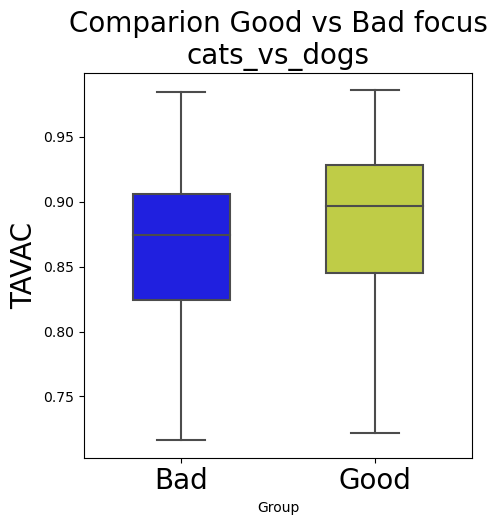

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df_bad = pd.DataFrame(diff_corr_badfocus)
df_bad['Group'] = 'Bad'

df_good = pd.DataFrame(diff_corr_goodfocus)
df_good['Group'] = 'Good'

df = df_bad.append(df_good)
df.columns = ['TAVAC','Group']

fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
my_pal = {"Good": "#d1e231", "Bad": "blue"}
sns.boxplot(x="Group",y="TAVAC",data=df,ax=ax,width=0.5, showfliers = False, palette=my_pal)
#sns.violinplot(x="Group",y="TAVAC",data=df,ax=ax,width=0.5, showfliers = False, palette=my_pal)

plt.ylabel('TAVAC',fontsize=font_size)
plt.title('Comparion Good vs Bad focus\n'+data_set,fontsize=font_size)
plt.xticks(fontsize=font_size)

In [35]:
print("/projects/li-lab/Yue/SpatialAnalysis/py/DylanCode/BadFocusImages-"+data_set+"/ValidationStage1/*")

/projects/li-lab/Yue/SpatialAnalysis/py/DylanCode/BadFocusImages-cifar10/ValidationStage1/*


In [53]:
#########prediction accuracy vs TAVAC
from datasets import load_dataset
from sklearn.metrics import accuracy_score

# imports the load_dataset function from the datasets module. Datasets
# module is a powerful tool for loading and working with various datasets
# that are commonly used in machine learning and natural language processing tasks.

data_set = 'food101'
num_epoch = 100

if data_set == 'cifar10':
    train_ds, test_ds = load_dataset(data_set, split=['train[:1000]', 'test[:100]'])
    
if data_set == 'food101':
    
# load_dataset fuction is used to load the cifar10 dataset. 
# The data set is split into two subsets: 'train' and 'test'. 

splits = train_ds.train_test_split(test_size=0.5, seed=1024)
train_ds = splits['train']
val_ds = splits['test']

from torchvision.transforms import (CenterCrop, 
                                    Compose, 
                                    Normalize, 
                                    RandomHorizontalFlip,
                                    RandomResizedCrop, 
                                    Resize, 
                                    ToTensor)

from transformers import ViTImageProcessor
# the line imports the ViTImageProcessor from the transformers library. 
# The transformers library provides state-of-the-art pretrained models and utilities
# for natural language processing and computer vision tasks 

processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")
image_mean, image_std = processor.image_mean, processor.image_std
size = processor.size["height"]

normalize = Normalize(mean=image_mean, std=image_std)
_train_transforms = Compose(
        [
            RandomResizedCrop(size),
            RandomHorizontalFlip(),
            ToTensor(),
            normalize,
        ]
    )

_val_transforms = Compose(
        [
            Resize(size),
            CenterCrop(size),
            ToTensor(),
            normalize,
        ]
    )

def train_transforms(examples):
    examples['pixel_values'] = [_train_transforms(image.convert("RGB")) for image in examples['img']]
    return examples

def val_transforms(examples):
    examples['pixel_values'] = [_val_transforms(image.convert("RGB")) for image in examples['img']]
    return examples

# Set the transforms
train_ds.set_transform(train_transforms)
# sets the transformation on the train_ds dataset to be train_transforms, 
# the function defined earlier

val_ds.set_transform(val_transforms)
# it sets the transformation for the validation dataset to be val_transforms
# This means that when retrieving examples from the validation dataset, 
# val_transforms functionn will be applied to preprocess the images

test_ds.set_transform(val_transforms)
# val_transfomrs function is applied to preprocess images in test dataset 


# By setting the transformations for each dataset, 
# you ensure that the appropriate preprocessing steps are automatically applied to the images
# from the respective datasets during training, validation, or testing. 
# These transformations could include resizing, cropping, flipping, and normalization, 
# as defined in the train_transforms and val_transforms functions.

import os
num_epoch = 100
#os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:1024"
#os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "1024"
torch.cuda.empty_cache()
#print(torch.cuda.memory_summary(device='cuda:0', abbreviated=False))
#os.environ['CUDA_VISIBLE_DEVICES']=''

if torch.cuda.is_available(): 
    dev = "cuda:0" 
else: 
    dev = "cpu"

device = torch.device(dev)
# These lines import the necessary classes, 'TrainingArguments' and 'Trainer',
# from the 'transformers' library. 
# These classes provide functionalities from configuring and executing the 
# training process for machine learning models.

metric_name = "accuracy"

# variable is set 'accuracy'
# This variable represents the name of the metric that will be used
# to evaluate performance of the model during training and determine 
# the best model based on this metric. 


from torch.utils.data import DataLoader
import torch

def collate_fn(examples):
    pixel_values = torch.stack([example["pixel_values"] for example in examples])
    labels = torch.tensor([example["label"] for example in examples])
    return {"pixel_values": pixel_values, "labels": labels}
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return dict(accuracy=accuracy_score(predictions, labels))

args = TrainingArguments(
    f'{data_set}_checkpoints_stage2',
    save_strategy="no",
    evaluation_strategy="no",
    learning_rate=1e-3,
#     2e-5
    #0.0001
    per_device_train_batch_size=128,
#     10
    #32
    per_device_eval_batch_size=4,
    num_train_epochs=num_epoch,
    weight_decay=0,
#     it was 0.01
    #0 FOR OVERFIIY
    load_best_model_at_end=False,
    metric_for_best_model=metric_name,
    logging_dir='logs',
    remove_unused_columns=False,
    seed = 42,
    adam_beta1 = 0.9,
    adam_beta2 = 0.9,
    lr_scheduler_type = 'cosine',
    max_grad_norm = 1,
    logging_strategy = 'epoch'
)


#device = 'cpu'
model_file = "../../saved_models/ViT_pretrained_"+data_set+"_e"+str(num_epoch)+"_stage1.pt"
#model_file = "ViT_umap_Cluster_c7_C1D1_ep10k_"+region+'.h5'

model = torch.load(model_file, map_location=device)
model.eval()

import torch
# this code imports the torch library 

trainer = Trainer(
    model,
    args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    tokenizer=processor,
    
)

Found cached dataset food101 (/home/c-zhaoy/.cache/huggingface/datasets/food101/default/0.0.0/7cebe41a80fb2da3f08fcbef769c8874073a86346f7fb96dc0847d4dfc318295)

100%|██████████| 1/1 [00:00<00:00, 181.71it/s]


ValueError: not enough values to unpack (expected 2, got 1)

In [14]:
outputs = trainer.predict(val_ds)


/projects/compsci/Yue/Anaconda3/envs/torch_env/lib/python3.9/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


In [16]:
pred = outputs.predictions.argmax(1)

ifCorrect1 = (pred == outputs.label_ids)
WrongPred1 = np.where(~ifCorrect1)

In [17]:
len(WrongPred1[0])/500

0.312

In [21]:
#device = 'cpu'
model_file = "../../saved_models/ViT_pretrained_"+data_set+"_e"+str(num_epoch)+"_stage2.pt"
#model_file = "ViT_umap_Cluster_c7_C1D1_ep10k_"+region+'.h5'

model = torch.load(model_file, map_location=device)
model.eval()

import torch
# this code imports the torch library 

trainer = Trainer(
    model,
    args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    tokenizer=processor,
    
)
outputs = trainer.predict(train_ds)
pred = np.argmax(outputs.predictions, axis=1)
ifCorrect2 = (pred == outputs.label_ids)
WrongPred2 = np.where(~ifCorrect2)

/projects/compsci/Yue/Anaconda3/envs/torch_env/lib/python3.9/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


In [22]:
len(WrongPred2[0])/500

0.338

In [26]:


diff_corr1 = [] #model stage 1
diff_corr2 = [] #model stage 2
num_epoch = 100
for i in range(500):
    f1 = f'{data_set}_validation_img_2stage_e{str(num_epoch)}/{i}_test.png'
    im_array1 = np.asarray(Image.open(f1).convert('RGB'))
    
    f2 = f'{data_set}_train_img_e{str(num_epoch)}/{i}_train.png'
    im_array2 = np.asarray(Image.open(f2).convert('RGB'))
    cor1 = np.corrcoef(im_array1.flatten(), im_array2.flatten())[0,1]
    
    #print(cor1)
    
    f1 = f'{data_set}_train_img_2stage_e{str(num_epoch)}/{i}_train.png'
    im_array1 = np.asarray(Image.open(f1).convert('RGB'))
    
    f2 = f'{data_set}_validation_img_e{str(num_epoch)}/{i}_test.png'
    im_array2 = np.asarray(Image.open(f2).convert('RGB'))
    cor2 = np.corrcoef(im_array1.flatten(), im_array2.flatten())[0,1]
    
    #print(cor2)
    diff_corr2.append(cor1)
    diff_corr1.append(cor2)


/tmp/ipykernel_169131/1725388961.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Group'][df2['Group'] == 0] = 'Wrong'
/tmp/ipykernel_169131/1725388961.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Group'][df2['Group'] == 1] = 'Correct'


Text(0.5, 1.0, 'Prediction vs TAVAC')

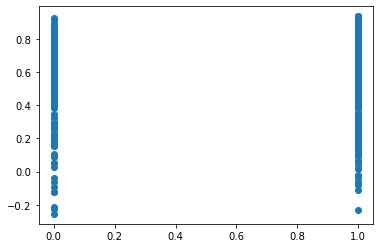

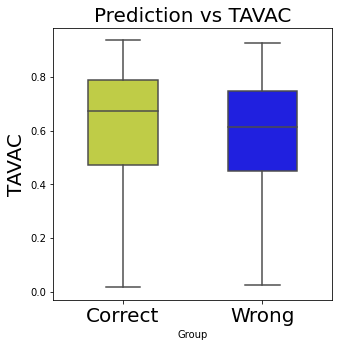

In [44]:
import matplotlib.pyplot as plt

plt.scatter(ifCorrect2, diff_corr2)

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df2 = pd.DataFrame(diff_corr2)
df2['Group'] = ifCorrect2
df2['Group'][df2['Group'] == 0] = 'Wrong'
df2['Group'][df2['Group'] == 1] = 'Correct'
df2.columns = ['TAVAC','Group']

# fig, ax = plt.subplots()
# fig.set_size_inches(5, 5)
# my_pal = {"Wrong": "blue", "Correct": "#d1e231"}
# sns.boxplot(x="Group",y="TAVAC",data=df2,ax=ax,width=0.5, showfliers = False, palette=my_pal)
# #sns.violinplot(x="Group",y="TAVAC",data=df,ax=ax,width=0.5, showfliers = False, palette=my_pal)

# plt.ylabel('TAVAC',fontsize=font_size)
# plt.xticks(fontsize=font_size)
# plt.title('Prediction vs TAVAC', fontsize=font_size)

In [28]:
import scipy

from scipy import stats

# Two-sample t-test
statistic, pvalue = stats.ttest_ind(df['TAVAC'][df['Group'] == 'Wrong'],df['TAVAC'][df['Group'] == 'Correct'])

print(f'Two-sample t-test: s = {statistic:5.3f}, p = {pvalue:5.5f}')

Two-sample t-test: s = -2.062, p = 0.03970


/tmp/ipykernel_169131/940968029.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Group'][df1['Group'] == 0] = 'Wrong'
/tmp/ipykernel_169131/940968029.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Group'][df1['Group'] == 1] = 'Correct'


(array([0, 1]), [Text(0, 0, 'Wrong'), Text(1, 0, 'Correct')])

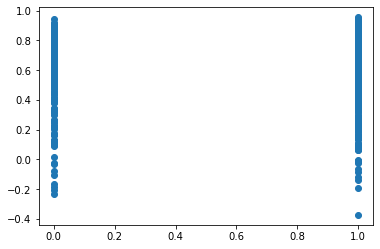

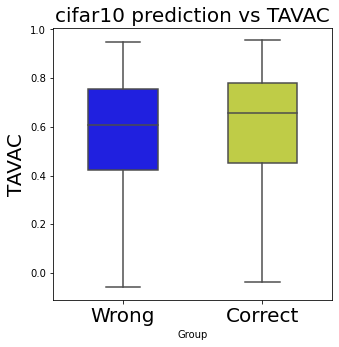

In [45]:
import matplotlib.pyplot as plt

plt.scatter(ifCorrect1, diff_corr1)

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df1 = pd.DataFrame(diff_corr1)
df1['Group'] = ifCorrect1
df1['Group'][df1['Group'] == 0] = 'Wrong'
df1['Group'][df1['Group'] == 1] = 'Correct'
df1.columns = ['TAVAC','Group']

df = df1.append(df2)
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
my_pal = {"Wrong": "blue", "Correct": "#d1e231"}
sns.boxplot(x="Group",y="TAVAC",data=df,ax=ax,width=0.5, showfliers = False, palette=my_pal)
#sns.violinplot(x="Group",y="TAVAC",data=df,ax=ax,width=0.5, showfliers = False, palette=my_pal)

plt.ylabel('TAVAC',fontsize=font_size)
plt.title(data_set+' prediction vs TAVAC',fontsize=font_size)
plt.xticks(fontsize=font_size)

In [43]:
df.shape

(1000, 2)

In [42]:
import scipy

from scipy import stats

# Two-sample t-test
statistic, pvalue = stats.ttest_ind(df['TAVAC'][df['Group'] == 'Wrong'],df['TAVAC'][df['Group'] == 'Correct'])

print(f'Two-sample t-test: s = {statistic:5.3f}, p = {pvalue:5.5f}')

Two-sample t-test: s = -2.253, p = 0.02450


In [31]:
id2label = {id:label for id, label in enumerate(train_ds.features['label'].names)}
# id2label is dictionnary. Enumerate fuction is used to iterate over the names of the class labels 
# in the 'label' feature of the'train_ds' dataset. For each label, the corresponding ID(index) is
# assigned as a key, and the labe itself is assiged as the value.

label2id = {label:id for id,label in id2label.items()}
# reverses the order of each key-value pair in the dictionary 

id2label

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}